# Wine Quality Classifier

## QMIND

### Ben Barcados

## Part 1: Imports

In [26]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
#used to create the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

#Used to save figures
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

## Part 2: Reading Wine Data

In [12]:
#Function reads dataset from csv file
def readData():

    #Read file
    file = 'winequality-red.csv'
    balance_data = pd.read_csv(file) 
    
    #Print Dataset
    #print("Dataset: \n")
    #print(balance_data)
    #print("\n")

    return balance_data

## Part 3: Split Wine Data

In [13]:
#Function splits dataset
def splitSet(balance_data):
    
    #Separating input and output
    X=balance_data.values[:,0:10]
    Y=balance_data.values[:,11]
    
    #Separate training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
    
    return X, Y, X_train, X_test, y_train, y_test

## Training Classifiers

In [63]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 

    # Performing training 
    clf_gini.fit(X_train, y_train) 
    
    return clf_gini

# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_leaf = 5) 

    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    
    return clf_entropy

#Function preforms training with random forest analysis
def train_using_rfc(X_train, X_test, y_train):
    
    #Random Forest Classifier object
    rfc = RandomForestClassifier(n_estimators=200)
    
    #Preform Training
    rfc.fit(X_train, y_train)
    
    return rfc

#Function preforms training with stochastic gradient decent classifier 
def train_using_sgd(X_train, X_test, y_train):
    
    #Stochastic Gradient Decent Classifier
    sgd = SGDClassifier(penalty=None)
    
    #Preform Training
    sgd.fit(X_train, y_train)
    
    return sgd

#Functions preforms training with support vector classifier
def train_using_svc(X_train, X_test, y_train):
    
    #Support Vector Classifier
    svc = SVC()
    
    #Preform Training
    svc.fit(X_train, y_train)
    
    return svc

## Predict and Analyze Results

In [76]:
# Function to make predictions 
def prediction(X_test, clf_object): 

    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    #print("Predicted values:") 
    #print(y_pred) 
    return y_pred 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred, title, cmap=plt.cm.Blues): 

    #print ("Accuracy : \n", 
    #accuracy_score(y_test,y_pred)*100) 
    
    #print("Confusion Matrix: \n")
    cm = confusion_matrix(y_test, y_pred)
    #full_cm = add_dims(cm,2,2)
    
    pp = PdfPages('Wine_Confusion_Matricies.pdf')#creates pdf to save figures
    plot_conf_matrix(y_test, y_pred, cm, np.array([3,4,5,6,7,8]), True, title)
    plt.savefig(pp, format='pdf')#appends the figure to the pdf
    #plot_conf_matrix(y_test, y_pred, cm, np.array([1,2,3,4,5,6,7,8,9,10]), True, "Full Confusion Matrix")
    #plt.savefig(pp, format='pdf')#appends the figure to the pdf
    pp.close()#closes the pdf and saves it
    return accuracy_score(y_test, y_pred)*100
    
#Takes in the confusion matrix and plots it
def plot_conf_matrix(y_test, y_pred, cm, classes, in_percent=True, title='Confusion Matrix', cmap=plt.cm.Blues):
    #takes in the confusion matrix (cm), the class names, if the values should be reported in %, the title, and the color
    
    
    #Sets up the figure with title, tickmarks, axis labels,and a colorbar legend
    plt.figure()
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))#sets up tick marks with labels
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    #uses threshold for determining text color
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):#creates plot with text in it
        plt.text(j, i, cm[i,j], horizontalalignment = "center", color="white" if cm[i,j] > thresh else "black")

    


#cm = confusion_matrix(y_test, y_pred)
#full_cm = add_dims(cm,2,2)

def compare_classifiers(Agini, Aent, Arfc, Asgd, Asvc):

    #Sets up the figure with title, tickmarks, axis labels,and a colorbar legend
    plt.figure()
    plt.title("Comparative Accuracy of Classifiers")
    y=[Agini, Aent, Arfc, Asgd, Asvc]
    x=["Gini","Entropy","Random Forest","Stochastic Gradient Decent","Supourt Vector"]
    tick_marks = np.arange(len(x))#sets up tick marks with labels
    plt.bar(tick_marks, y, align='center', color=['blue', 'orange', 'green', 'red', 'violet'])
    plt.xticks(tick_marks, x, rotation=45)
    plt.yticks(tick_marks, np.array[0, 20, 40, 60, 80, 100])
    plt.ylabel("Accuarcy(%)")
    plt.xlabel("Classifier")
    plt.show()


## Main Method

C:\Users\benba\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Results Using Gini Index:
Results Using Entropy:
Results Using Random Forest Classifier:
Results Using Stochastic Gradient Decent Classifier:
Results Using Support Vector Classifier:


TypeError: 'builtin_function_or_method' object is not subscriptable

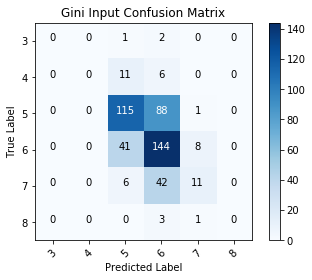

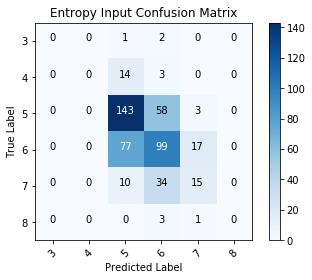

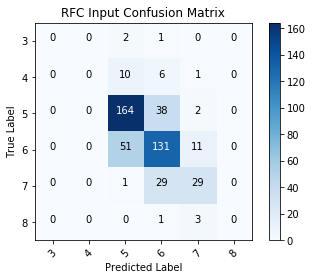

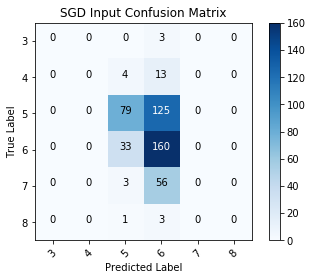

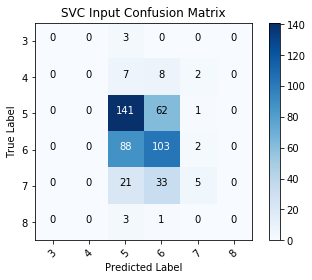

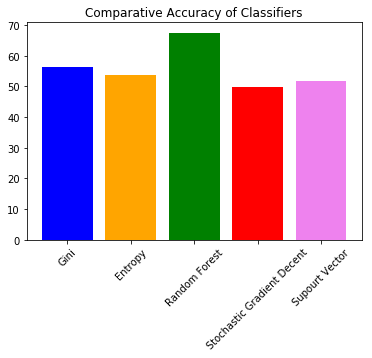

In [77]:
# Driver code 
def main(): 

    #Building Phase 
    #Obtaining Data
    data = readData()
    
    #Split Data
    
    X, Y, X_train, X_test, y_train, y_test = splitSet(data)
    
    #Standard Scaler used to pre-process data
    #sc = StandardScaler()
    
    #Scale data
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.fit_transform(X_test)
    
    
    #Training Trees
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    rfc = train_using_rfc(X_train, X_test, y_train)
    sgd = train_using_sgd(X_train, X_test, y_train)
    svc = train_using_svc(X_train, X_test, y_train)

    # Operational Phase 
    print ("Results Using Gini Index:") 
    
    # Prediction using Gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    Agini = cal_accuracy(y_test, y_pred_gini, "Gini Input Confusion Matrix") 
    
    # Prediction using Entropy
    print ("Results Using Entropy:")  
    y_pred_entropy = prediction(X_test, clf_entropy) 
    Aent = cal_accuracy(y_test, y_pred_entropy, "Entropy Input Confusion Matrix") 
    
    
    # Prediction using Random Forest Classifier
    print ("Results Using Random Forest Classifier:")  
    y_pred_rfc = prediction(X_test, rfc) 
    Arfc=cal_accuracy(y_test, y_pred_rfc, "RFC Input Confusion Matrix")

    
    # Prediction using Stochastic Gradient Decent Classifier
    print ("Results Using Stochastic Gradient Decent Classifier:")  
    y_pred_sgd = prediction(X_test, sgd) 
    Asgd=cal_accuracy(y_test, y_pred_sgd, "SGD Input Confusion Matrix")
    
    # Prediction using Support Vector Classifier
    print ("Results Using Support Vector Classifier:") 
    y_pred_svc = prediction(X_test, svc) 
    Asvc=cal_accuracy(y_test, y_pred_svc, "SVC Input Confusion Matrix")
    
    compare_classifiers(Agini, Aent, Arfc, Asgd, Asvc) 
    
# Calling main function 
if __name__=="__main__": 
    main() 
